<a href="https://colab.research.google.com/github/FatemehAbediK/deep-learning-medical/blob/main/CNN_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/dataset files/heart.csv')


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
x=df.drop("target" , axis=1)
y=df["target"]
x.shape , y.shape

((1025, 13), (1025,))

In [13]:
from sklearn.preprocessing import LabelEncoder
x=x.apply(LabelEncoder().fit_transform)

In [14]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,18,1,0,18,43,0,1,67,0,10,2,2,3
1,19,1,0,28,34,1,0,54,1,29,0,0,3
2,36,1,0,31,12,0,1,25,1,25,0,0,3
3,27,1,0,33,34,0,1,60,0,0,2,1,3
4,28,0,0,27,116,1,1,9,0,18,1,3,2


In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [16]:
x_train.shape , y_train.shape

((717, 13), (717,))

In [17]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [18]:
x_train[1]

array([24,  1,  0, 20, 47,  0,  0, 31,  1, 21,  1,  3,  3])

In [19]:
x_test[1]

array([19,  0,  2, 20, 47,  0,  0, 16,  0,  0,  2,  0,  0])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform (x_test)

In [21]:
x_train[1]

array([0.6       , 1.        , 0.        , 0.41666667, 0.31333333,
       0.        , 0.        , 0.34444444, 1.        , 0.53846154,
       0.5       , 0.75      , 1.        ])

In [22]:
x_test[1]

array([0.475     , 0.        , 0.66666667, 0.41666667, 0.31333333,
       0.        , 0.        , 0.17777778, 0.        , 0.        ,
       1.        , 0.        , 0.        ])

In [23]:
import tensorflow as tf
from tensorflow import keras

In [27]:
model=keras.Sequential()

model.add(keras.Input(shape=(13, )))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer=tf.optimizers.Adam() ,loss=tf.losses.binary_crossentropy , metrics=['accuracy'])


In [28]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,457 (201.00 KB)

 Trainable params: 51,457 (201.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
hist=model.fit(x_train , y_train , epochs=20 , batch_size=64 , validation_data=(x_test , y_test))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.5877 - loss: 0.6838 - val_accuracy: 0.8052 - val_loss: 0.6121
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7224 - loss: 0.6127 - val_accuracy: 0.8247 - val_loss: 0.4689
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7530 - loss: 0.5232 - val_accuracy: 0.8019 - val_loss: 0.4182
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7819 - loss: 0.4366 - val_accuracy: 0.8442 - val_loss: 0.3757
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8228 - loss: 0.4002 - val_accuracy: 0.8344 - val_loss: 0.3759
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7992 - loss: 0.4283 - val_accuracy: 0.8506 - val_loss: 0.3602
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8654 - loss: 0.3857 - val_accuracy: 0.8506 - val_loss: 0.3649
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8586 - loss: 0.3557 - val_accuracy: 0.8539 - val_los

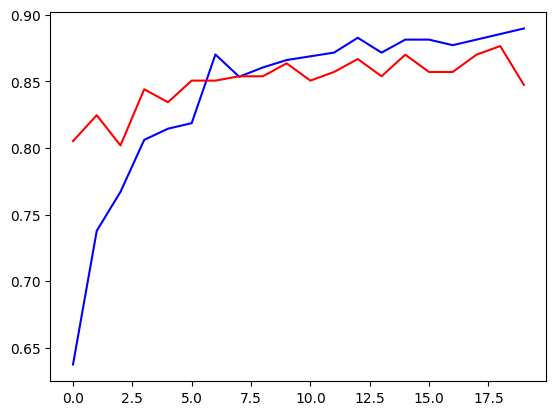

In [30]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy' ],color="blue")
plt.plot(hist.history['val_accuracy'] ,color="red")


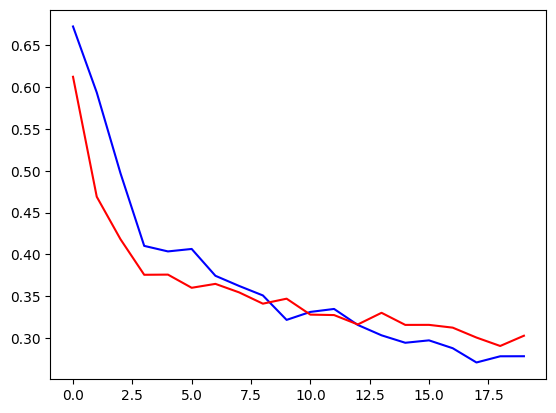

In [31]:
plt.plot(hist.history['loss' ],color="blue")
plt.plot(hist.history['val_loss'] ,color="red")